In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib as mpl

# Correctly specify the directory containing the font
font_dirs = ["/shared-local/mdani31/micromamba/envs/semiollm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf"]  # Directory, not the file
font_files = fm.findSystemFonts(fontpaths=font_dirs)

# Add the font to Matplotlib's font manager
for font_file in font_files:
    fm.fontManager.addfont(font_file)



Duplicate key in file '/home/akata/mdani31/official_semiollm/semiollm/visualization/.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sa

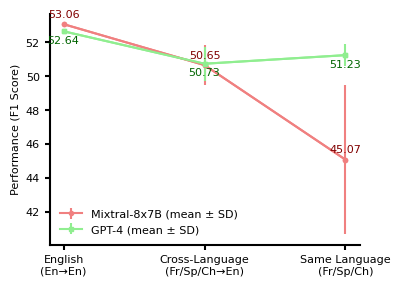

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


# Calculate averages
mixtral_data = [
    53.06,  # En-En
    np.mean([52.11, 50.57, 49.26]),  
    np.mean([47.92, 48.43, 38.86])  
]

gpt4_data = [
    52.64,  # En-En
    np.mean([49.44, 51.85, 50.89]),  
    np.mean([51.20, 52.03, 50.47])   
]

# Calculate standard deviations
mixtral_std = [
    0.0,  # En-En
    np.std([52.11, 50.57, 49.26]),  
    np.std([47.92, 48.43, 38.86])   
]

gpt4_std = [
    0.0,  # En-En
    np.std([49.44, 51.85, 50.89]),  
    np.std([51.20, 52.03, 50.47])   
]

with mpl.rc_context(fname="/home/akata/mdani31/official_semiollm/semiollm/visualization/.matplotlibrc"):
    # Create the plot
    plt.figure(figsize=(4,3))
    categories = ['English\n(En→En)', 'Cross-Language\n(Fr/Sp/Ch→En)', 'Same Language\n(Fr/Sp/Ch)']
    x = range(len(categories))

    plt.plot(x, mixtral_data, 'o-', color='lightcoral')
    plt.plot(x, gpt4_data, 's-', color='lightgreen')
    plt.errorbar(x, mixtral_data, yerr=mixtral_std, fmt='o-', color='lightcoral', label='Mixtral-8x7B (mean ± SD)')
    plt.errorbar(x, gpt4_data, yerr=gpt4_std, fmt='s-', color='lightgreen', label='GPT-4 (mean ± SD)')
    # Add value labels
    for i, value in enumerate(mixtral_data):
        plt.text(i, value + 0.4, f'{value:.2f}', ha='center', color='maroon', fontsize=8)
    for i, value in enumerate(gpt4_data):
        plt.text(i, value - 0.7, f'{value:.2f}', ha='center', color='darkgreen', fontsize=8)

    plt.ylabel('Performance (F1 Score)', fontsize=8)
    plt.legend(loc='lower left', frameon=False, framealpha=0.9, fontsize=8)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    # Set x-axis ticks
    plt.xticks(x, categories, fontsize=8)
    plt.grid(False)
    plt.savefig('language_avg.svg')
    plt.show()
